In [ ]:
# Functional API 이용하여 1개 입력, 2개 출력 모델(숫자(0 ~ 9), 홀수/짝수 예측)

In [29]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [32]:
# Train label의 숫자를 보고 짝수(0), 홀수(1)로 나누기
y_train_odd = []
for y in y_train:
    if y % 2 == 0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [35]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [37]:
# Test label의 숫자를 보고 짝수(0), 홀수(1)로 나누기
y_test_odd = []
for y in y_test:
    if y % 2 == 0:
        y_test_odd.append(0)
    else:
        y_test_odd.append(1)

y_test_odd = np.array(y_test_odd)
y_test_odd.shape

(10000,)

In [39]:
# 정규화(Normalization)
# Normalized inputs ensure gradients are not too larger or too small, 
# leading to faster and more stable convergence
# Many activation functions(like sigmoid and tanh) operate optimally when inputs lie within a small, consistent range
x_train = x_train / 255.0
x_test = x_test / 255.0

# 채널 추가: reshape, tf.newaxis, expand_dims 이용 가능
x_train = tf.expand_dims(x_train, -1)
x_test = tf.expand_dims(x_test, -1)

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [41]:
# Functional API를 사용하여 모델 생성
# 입력 1개: 이미지 (28 x 28)
# 출력 2개
# 1) 홀짝 분류: 이미지 > Flatten
# 2) 0 ~ 9 숫자 분류: 이미지 > CNN > Flatten > concat(홀짝 Flatten + CNN Flatten) > DNN

# 입력
inputs = tf.keras.layers.Input(shape = (28, 28, 1), name = 'inputs')

# 컨볼루션
conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name = 'maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name = 'flatten_layer')(pool)

# concat
flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])

# 출력
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name = 'digit_dense')(concat)
odd_outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'odd_dense')(flat_inputs)

# 모델
model = tf.keras.models.Model(inputs = inputs, outputs = [digit_outputs, odd_outputs])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer) │ (None, 28, 28, 1) │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_layer        │ (None, 26, 26,    │        320 │ inputs[0][0]      │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ maxpool_layer       │ (None, 13, 13,    │          0 │ conv2d_layer[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_layer       │ (None, 5408)      │          0 │ maxpool_layer[0]… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 784)       │          0 │ inputs[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 6192)      │          0 │ flatten_layer[0]… │
│ (Concatenate)       │                   │            │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit_dense (Dense) │ (None, 10)        │     61,930 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ odd_dense (Dense)   │ (None, 1)         │        785 │ flatten_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 63,035 (246.23 KB)

 Trainable params: 63,035 (246.23 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
print(model.input)
print(model.output)

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=inputs>
[<KerasTensor shape=(None, 10), dtype=float32, sparse=False, ragged=False, name=keras_tensor_19>, <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_20>]


In [45]:
model.compile(optimizer = 'adam',
             loss = {"digit_dense": "sparse_categorical_crossentropy", "odd_dense": 'binary_crossentropy'},
             loss_weights={'digit_dense': 1, 'odd_dense': 0.5}, # Loss = 1.0 * "sprase_categorical_crossentropy" + 0.5 * binary_cross entropy
             metrics = {'digit_dense': 'accuracy', 'odd_dense': 'accuracy'})

In [47]:
# 입력, 출력: 딕셔너리 형태로 {레이어 이름: 데이터셋} 포맷으로 주어야 함
history = model.fit(x = {'inputs': x_train}, y = {'digit_dense': y_train, 'odd_dense': y_train_odd},
                   validation_data = ({'inputs': x_test}, {'digit_dense': y_test, 'odd_dense': y_test_odd}),
                   epochs = 10)

Epoch 1/10
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - digit_dense_accuracy: 0.8895 - digit_dense_loss: 0.3871 - loss: 0.5733 - odd_dense_accuracy: 0.8445 - odd_dense_loss: 0.3724

/Users/shinjoohwan/miniconda3/lib/python3.12/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: inputs
Received: inputs=['Tensor(shape=(None, 28, 28, 1))']
  warnings.warn(msg)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - digit_dense_accuracy: 0.8899 - digit_dense_loss: 0.3858 - loss: 0.5718 - odd_dense_accuracy: 0.8447 - odd_dense_loss: 0.3720 - val_digit_dense_accuracy: 0.9748 - val_digit_dense_loss: 0.0904 - val_loss: 0.2272 - val_odd_dense_accuracy: 0.8898 - val_odd_dense_loss: 0.2732
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - digit_dense_accuracy: 0.9756 - digit_dense_loss: 0.0843 - loss: 0.2210 - odd_dense_accuracy: 0.8911 - odd_dense_loss: 0.2735 - val_digit_dense_accuracy: 0.9784 - val_digit_dense_loss: 0.0684 - val_loss: 0.2003 - val_odd_dense_accuracy: 0.8962 - val_odd_dense_loss: 0.2635
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - digit_dense_accuracy: 0.9817 - digit_dense_loss: 0.0624 - loss: 0.1925 - odd_dense_accuracy: 0.8977 - odd_dense_loss: 0.2602 - val_digit_dense_accuracy: 0.9791 - val_digit_dense_loss: 0.0625 - val_loss: 0.1921 - val_odd_dense_accuracy: 0.8981 - val_odd_dense_loss: 0.2588
Epoch 4/10
1875/1875 ━━━━━━

In [51]:
model.evaluate({'inputs': x_test}, {'digit_dense': y_test, 'odd_dense': y_test_odd})

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - digit_dense_accuracy: 0.9798 - digit_dense_loss: 0.0754 - loss: 0.2094 - odd_dense_accuracy: 0.8975 - odd_dense_loss: 0.2678


[0.1902114450931549,
 0.0611436553299427,
 0.2578381299972534,
 0.9839000105857849,
 0.9016000032424927]

In [53]:
history.history.keys()

dict_keys(['digit_dense_accuracy', 'digit_dense_loss', 'loss', 'odd_dense_accuracy', 'odd_dense_loss', 'val_digit_dense_accuracy', 'val_digit_dense_loss', 'val_loss', 'val_odd_dense_accuracy', 'val_odd_dense_loss'])

In [55]:
x_range = range(1, len(history.history['digit_dense_accuracy'])+1)

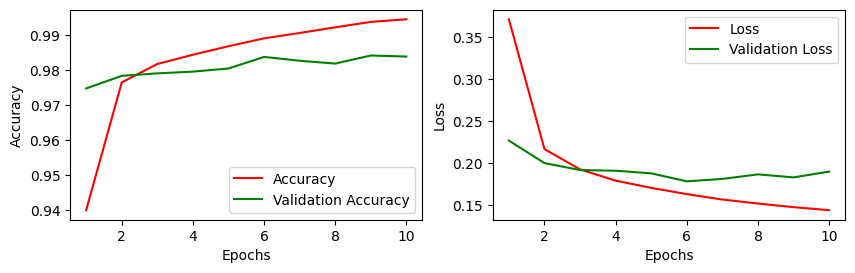

In [57]:
plt.figure(figsize = (10, 6))
plt.subplot(221)
plt.plot(x_range, history.history['digit_dense_accuracy'], color = 'red', label = "Accuracy")
plt.plot(x_range, history.history['val_digit_dense_accuracy'], color = 'green', label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(222)
plt.plot(x_range, history.history['loss'], color = 'red', label = "Loss")
plt.plot(x_range, history.history['val_loss'], color = 'green', label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.show()

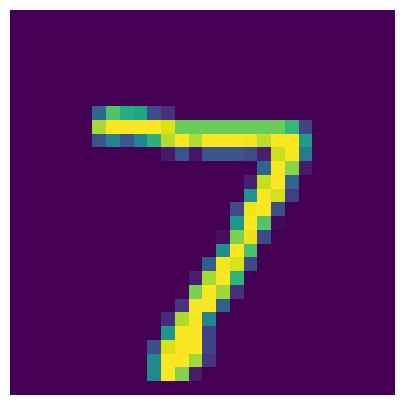

In [63]:
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5,5))
    plt.imshow(np.squeeze(data[idx]))
    plt.axis('off')
    plt.show()

plot_image(x_test, 0)

In [65]:
digit_preds, odd_preds = model.predict(x_test)
print(digit_preds[0])
print(odd_preds[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step
[9.0468869e-11 7.7677625e-10 6.2200563e-08 3.1316117e-07 7.5803544e-11
 4.8518958e-12 3.5232285e-19 9.9999940e-01 1.1219171e-08 9.4057093e-08]
[0.99937516]


In [67]:
# 숫자 0~9예측
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [69]:
# 홀수/짝수 예측: 짝수 0, 홀수 1
odd_labels = np.where(odd_preds > 0.5, 1, 0).reshape(-1)
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])